# Домашнее задание

1. Добиться хорошего результата от модели, собранной на занятии (5 угаданныx картинок из 8 предложенных). Варианты изменений:
- изменение слоёв и их количества;
- изменение метода оптимизации;
- изменение процесса обучения;

ДОПОЛНЕНИЯ ПОМЕЧЕНЫ "##"

In [102]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from torch import nn
from torch import optim

import torchvision
import torch.nn.functional as F
import torchvision.transforms as transforms

In [103]:
train_dataset = torchvision.datasets.CIFAR10(root='data/',
                                              train=True,
                                              transform=transforms.ToTensor(), 
                                              download=True)


image, label = train_dataset[0]
print(image.size())
print(label)

Files already downloaded and verified
torch.Size([3, 32, 32])
6


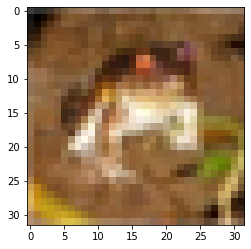

In [104]:
plt.imshow(image.permute(1, 2, 0).numpy())

In [105]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

In [106]:
test_dataset = torchvision.datasets.CIFAR10(root='./data', 
                                            train=False,
                                            download=True,
                                            transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, 
                                          batch_size=50,
                                          shuffle=False)

Files already downloaded and verified


In [107]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# сетка с урока

In [108]:
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 4 * hidden_dim)
        self.fc2 = nn.Linear(4 * hidden_dim, 2 * hidden_dim)
        self.fc3 = nn.Linear(2 * hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x)
        return x
    
    def predict(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x)
        x = F.softmax(x)
        return x


net = Net(3072, 100, 10)
net.train()

Net(
  (fc1): Linear(in_features=3072, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=100, bias=True)
  (fc4): Linear(in_features=100, out_features=10, bias=True)
)

In [109]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.0)

In [110]:
num_epochs = 5

for epoch in range(num_epochs):
    running_loss = 0.0
    running_items = 0.0


    for i, data in enumerate(train_loader):
        inputs, labels = data[0], data[1]

         # Обнуляем градиент
        optimizer.zero_grad()
        # Делаем предсказание
        outputs = net(inputs)
        # Рассчитываем лосс-функцию
        loss = criterion(outputs, labels)
        # Делаем шаг назад по лоссу
        loss.backward()
        # Делаем шаг нашего оптимайзера
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        running_items += len(labels)
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print(f'Epoch [{epoch + 1}/{num_epochs}]. ' \
                  f'Step [{i + 1}/{len(train_loader)}]. ' \
                  f'Loss: {running_loss / running_items:.3f}')
            running_loss, running_items = 0.0, 0.0

print('Training is finished!')

Epoch [1/5]. Step [1/782]. Loss: 0.036
Epoch [1/5]. Step [301/782]. Loss: 0.036
Epoch [1/5]. Step [601/782]. Loss: 0.035
Epoch [2/5]. Step [1/782]. Loss: 0.032
Epoch [2/5]. Step [301/782]. Loss: 0.032
Epoch [2/5]. Step [601/782]. Loss: 0.032
Epoch [3/5]. Step [1/782]. Loss: 0.032
Epoch [3/5]. Step [301/782]. Loss: 0.030
Epoch [3/5]. Step [601/782]. Loss: 0.030
Epoch [4/5]. Step [1/782]. Loss: 0.032
Epoch [4/5]. Step [301/782]. Loss: 0.029
Epoch [4/5]. Step [601/782]. Loss: 0.029
Epoch [5/5]. Step [1/782]. Loss: 0.032
Epoch [5/5]. Step [301/782]. Loss: 0.028
Epoch [5/5]. Step [601/782]. Loss: 0.028
Training is finished!


In [111]:
data_iter = iter(test_loader)
images, labels = data_iter.next()

GroundTruth:  cat ship ship plane frog frog car frog cat car plane truck dog horse truck ship dog horse ship frog horse plane deer truck dog bird deer plane truck frog frog dog deer dog truck bird deer car truck dog deer frog dog frog plane truck cat truck horse frog


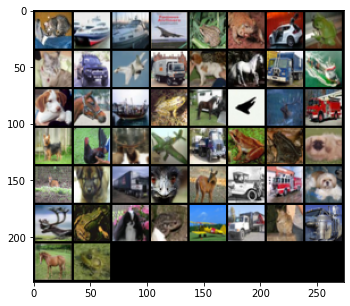

In [112]:
net.eval()
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.figure(figsize=(10, 5))
plt.imshow(imgs.permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join(classes[labels[j]] for j in range(len(labels))))

In [113]:
print(outputs)

tensor([[-0.4366,  0.7914,  0.3512,  1.3528, -0.3954,  1.5178,  0.2926, -1.4430,
         -0.0572, -1.0401],
        [ 0.9626,  3.2762, -1.8718, -1.1197, -2.4138, -2.3859, -2.6262, -1.0458,
          2.8584,  4.2082],
        [ 1.5003,  1.6918, -1.0130, -0.8313, -1.8953, -1.4371, -2.8828, -0.9293,
          3.3876,  2.5356],
        [ 1.9329,  0.4362,  0.4923, -0.8738, -0.7603, -1.0987, -2.3412, -0.3669,
          2.3941,  0.8333],
        [-0.7070, -1.4719,  1.2577,  0.5960,  1.3055,  0.7992,  1.0836,  1.2389,
         -1.9990, -1.1939],
        [-1.8418,  0.5821,  0.2117,  1.0781,  0.2424,  0.6958,  2.0195,  0.0544,
         -2.5701,  0.1686],
        [-1.6497,  0.5576,  0.1892,  1.8747, -0.1073,  2.0839,  1.4280, -1.0099,
         -1.3227, -0.9267],
        [-0.8467, -1.5242,  1.5804,  0.2968,  1.5586,  0.5220,  1.4192,  1.3088,
         -2.2310, -1.2227],
        [-0.2212, -0.7111,  1.1488,  1.0029,  0.5367,  1.1112,  0.5213,  0.2137,
         -1.3178, -1.2541],
        [ 1.0353,  

In [114]:
_, predicted = torch.max(outputs, 1)

predicted

tensor([5, 9, 8, 8, 4, 6, 5, 2, 2, 1, 8, 9, 6, 1, 9, 2, 5, 7, 9, 6, 9, 0, 0, 9,
        7, 6, 6, 7, 9, 6, 6, 2, 5, 6, 9, 1, 6, 9, 9, 5, 0, 4, 9, 6, 0, 9, 6, 8,
        7, 6])

In [115]:
gt = np.array([classes[labels[j]] for j in range(len(labels))])
pred = np.array([classes[predicted[j]] for j in range(len(labels))])

print(gt)
print(pred)
print(f'Accuracy is {(gt == pred).sum() / len(gt)}')

['cat' 'ship' 'ship' 'plane' 'frog' 'frog' 'car' 'frog' 'cat' 'car'
 'plane' 'truck' 'dog' 'horse' 'truck' 'ship' 'dog' 'horse' 'ship' 'frog'
 'horse' 'plane' 'deer' 'truck' 'dog' 'bird' 'deer' 'plane' 'truck' 'frog'
 'frog' 'dog' 'deer' 'dog' 'truck' 'bird' 'deer' 'car' 'truck' 'dog'
 'deer' 'frog' 'dog' 'frog' 'plane' 'truck' 'cat' 'truck' 'horse' 'frog']
['dog' 'truck' 'ship' 'ship' 'deer' 'frog' 'dog' 'bird' 'bird' 'car'
 'ship' 'truck' 'frog' 'car' 'truck' 'bird' 'dog' 'horse' 'truck' 'frog'
 'truck' 'plane' 'plane' 'truck' 'horse' 'frog' 'frog' 'horse' 'truck'
 'frog' 'frog' 'bird' 'dog' 'frog' 'truck' 'car' 'frog' 'truck' 'truck'
 'dog' 'plane' 'deer' 'truck' 'frog' 'plane' 'truck' 'frog' 'ship' 'horse'
 'frog']
Accuracy is 0.42


# изменение слоёв и их количества


In [116]:
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 8 * hidden_dim) ##
        self.fc2 = nn.Linear(8 * hidden_dim, 4 * hidden_dim)
        self.fc3 = nn.Linear(4 * hidden_dim, 2 * hidden_dim)
        self.fc4 = nn.Linear(2 * hidden_dim, hidden_dim) 
        self.fc5 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x) ##
        x = F.relu(x) ##
        x = self.fc5(x)
        return x
    
    def predict(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x)
        x = F.relu(x) ##
        x = self.fc5(x) ##
        x = F.softmax(x)
        return x


net = Net(3072, 100, 10)
net.train()

Net(
  (fc1): Linear(in_features=3072, out_features=800, bias=True)
  (fc2): Linear(in_features=800, out_features=400, bias=True)
  (fc3): Linear(in_features=400, out_features=200, bias=True)
  (fc4): Linear(in_features=200, out_features=100, bias=True)
  (fc5): Linear(in_features=100, out_features=10, bias=True)
)

# изменение метода оптимизации и процесса обучения

In [133]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adagrad(net.parameters(), lr=0.001) ##

In [138]:
num_epochs = 3  ##
with torch.cuda.device("cuda:0"): ##
    for epoch in range(num_epochs):
        running_loss = 0.0
        running_items = 0.0


        for i, data in enumerate(train_loader):
            inputs, labels = data[0], data[1]

             # Обнуляем градиент
            optimizer.zero_grad()
            # Делаем предсказание
            outputs = net(inputs)
            # Рассчитываем лосс-функцию
            loss = criterion(outputs, labels)
            # Делаем шаг назад по лоссу
            loss.backward()
            # Делаем шаг нашего оптимайзера
            optimizer.step()

            # выводим статистику о процессе обучения
            running_loss += loss.item()
            running_items += len(labels)
            if i % 500 == 0:    # печатаем каждые 500 mini-batches
                print(f'Epoch [{epoch + 1}/{num_epochs}]. ' \
                      f'Step [{i + 1}/{len(train_loader)}]. ' \
                      f'Loss: {running_loss / running_items:.3f}')
                running_loss, running_items = 0.0, 0.0

print('Training is finished!')

Epoch [1/3]. Step [1/782]. Loss: 0.020
Epoch [1/3]. Step [501/782]. Loss: 0.022
Epoch [2/3]. Step [1/782]. Loss: 0.022
Epoch [2/3]. Step [501/782]. Loss: 0.022
Epoch [3/3]. Step [1/782]. Loss: 0.021
Epoch [3/3]. Step [501/782]. Loss: 0.022
Training is finished!


GroundTruth:  cat ship ship plane frog frog car frog cat car plane truck dog horse truck ship dog horse ship frog horse plane deer truck dog bird deer plane truck frog frog dog deer dog truck bird deer car truck dog deer frog dog frog plane truck cat truck horse frog


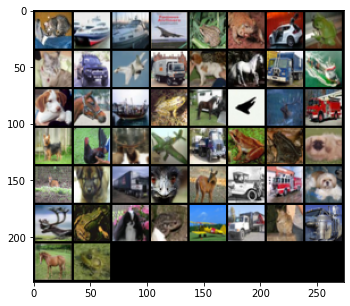

In [139]:
data_iter = iter(test_loader)
images, labels = data_iter.next()

net.eval()
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.figure(figsize=(10, 5))
plt.imshow(imgs.permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join(classes[labels[j]] for j in range(len(labels))))

In [140]:
_, predicted = torch.max(outputs, 1)

predicted

tensor([3, 9, 8, 0, 4, 6, 3, 6, 2, 1, 8, 9, 5, 7, 1, 8, 5, 4, 8, 6, 9, 2, 0, 9,
        4, 6, 4, 4, 1, 6, 6, 2, 4, 5, 9, 1, 6, 1, 9, 5, 0, 6, 3, 3, 0, 9, 3, 8,
        4, 6])

In [141]:
gt = np.array([classes[labels[j]] for j in range(len(labels))])
pred = np.array([classes[predicted[j]] for j in range(len(labels))])

print(gt)
print(pred)
print(f'Accuracy is {(gt == pred).sum() / len(gt)}')

['cat' 'ship' 'ship' 'plane' 'frog' 'frog' 'car' 'frog' 'cat' 'car'
 'plane' 'truck' 'dog' 'horse' 'truck' 'ship' 'dog' 'horse' 'ship' 'frog'
 'horse' 'plane' 'deer' 'truck' 'dog' 'bird' 'deer' 'plane' 'truck' 'frog'
 'frog' 'dog' 'deer' 'dog' 'truck' 'bird' 'deer' 'car' 'truck' 'dog'
 'deer' 'frog' 'dog' 'frog' 'plane' 'truck' 'cat' 'truck' 'horse' 'frog']
['cat' 'truck' 'ship' 'plane' 'deer' 'frog' 'cat' 'frog' 'bird' 'car'
 'ship' 'truck' 'dog' 'horse' 'car' 'ship' 'dog' 'deer' 'ship' 'frog'
 'truck' 'bird' 'plane' 'truck' 'deer' 'frog' 'deer' 'deer' 'car' 'frog'
 'frog' 'bird' 'deer' 'dog' 'truck' 'car' 'frog' 'car' 'truck' 'dog'
 'plane' 'frog' 'cat' 'cat' 'plane' 'truck' 'cat' 'ship' 'deer' 'frog']
Accuracy is 0.56
